Encoder Output Shape: (5, 8)


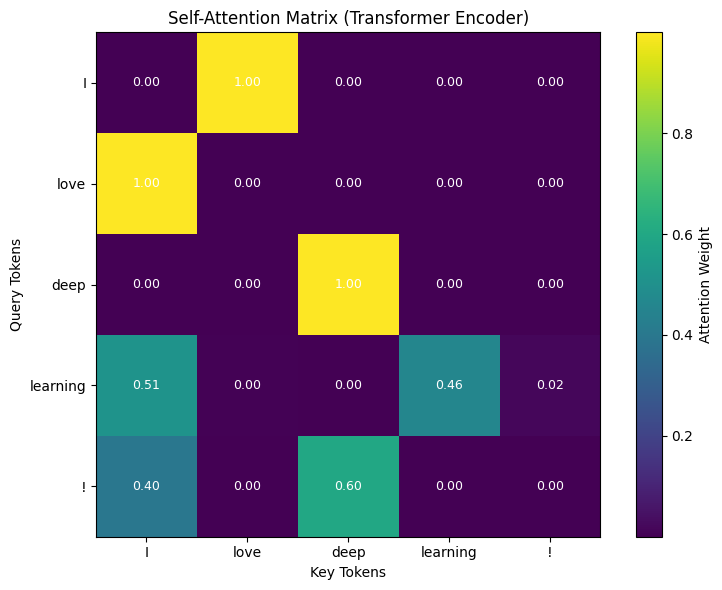

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Input: sequence embeddings
tokens = ["I", "love", "deep", "learning", "!"]
seq_len = len(tokens)
d_model = 8

X = np.random.randn(seq_len, d_model)

# Weight matrices
W_Q = np.random.randn(d_model, d_model)
W_K = np.random.randn(d_model, d_model)
W_V = np.random.randn(d_model, d_model)

W1 = np.random.randn(d_model, d_model * 2)
b1 = np.zeros(d_model * 2)

W2 = np.random.randn(d_model * 2, d_model)
b2 = np.zeros(d_model)

# Helper functions
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def layer_norm(x, eps=1e-6):
    mean = x.mean(axis=-1, keepdims=True)
    std = x.std(axis=-1, keepdims=True)
    return (x - mean) / (std + eps)

# Self-Attention
Q = X @ W_Q
K = X @ W_K
V = X @ W_V

scores = Q @ K.T / np.sqrt(d_model)
attention = softmax(scores)
attn_output = attention @ V

# Residual + Norm
X1 = layer_norm(X + attn_output)

# Feed Forward Network
ffn_hidden = np.maximum(0, X1 @ W1 + b1)   # ReLU
ffn_output = ffn_hidden @ W2 + b2

# Residual + Norm
encoder_output = layer_norm(X1 + ffn_output)

print("Encoder Output Shape:", encoder_output.shape)

# Visualization: Attention
plt.figure(figsize=(8,6))
plt.imshow(attention, cmap="viridis")
plt.colorbar(label="Attention Weight")

plt.xticks(range(seq_len), tokens)
plt.yticks(range(seq_len), tokens)

plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.title("Self-Attention Matrix (Transformer Encoder)")

for i in range(seq_len):
    for j in range(seq_len):
        plt.text(j, i, f"{attention[i,j]:.2f}",
                 ha="center", va="center", color="white", fontsize=9)

plt.tight_layout()
plt.show()